In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

print("All imports are ready")

All imports are ready


In [2]:
start = list(range(-3,51,3))
print(start)

[-3, 0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48]


In [3]:
restart = [num*2 for num in start if num > 5]
print(restart)

[12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72, 78, 84, 90, 96]


In [4]:
# Create arrays
import numpy as np
actual = np.array([10, 20, 30, 40])
predicted = np.array([12, 18, 33, 38])

# Element-wise difference (subtract matching positions)
differences = actual - predicted
# Result: array([-2, 2, -3, 2])
# Translation: "For each position, subtract predicted from actual"

# Absolute value (remove negatives)
abs_diff = np.abs(differences)
# Result: array([2, 2, 3, 2])
# Translation: "How far off, ignoring direction"

# Mean of absolute differences
mae = np.mean(abs_diff)
# Result: 2.25
# Translation: "On average, predictions are off by 2.25"

# One-liner version (what you'll see in practice)
mae = np.mean(np.abs(actual - predicted))

In [5]:
print(differences)

print(abs_diff)

print(mae)

[-2  2 -3  2]
[2 2 3 2]
2.25


In [6]:
Walkers = {
    "Dad": ["Male", 42],
    "Liam": ["Male", 14],
    "Delta": ["Female", 21],
    "Brooke": ["Female", 20],
    "Henry": ["Male", 11],
    "Clebo": ["Male", 16]
}


df = pd.DataFrame(Walkers)
print(df)

    Dad  Liam   Delta  Brooke Henry Clebo
0  Male  Male  Female  Female  Male  Male
1    42    14      21      20    11    16


In [7]:
Walkers["Tally"] = ["Doggo", 4.5]
print(df)

    Dad  Liam   Delta  Brooke Henry Clebo
0  Male  Male  Female  Female  Male  Male
1    42    14      21      20    11    16


In [8]:
df["Tally"] = ["Doggo", 4.5]
print(df)

    Dad  Liam   Delta  Brooke Henry Clebo  Tally
0  Male  Male  Female  Female  Male  Male  Doggo
1    42    14      21      20    11    16    4.5


In [9]:
df = pd.read_csv('../../data/raw/listings.csv')
pd.set_option('display.max_rows', None)
df.head(3).T

,0,1,2
id,5456,5769,6413
listing_url,https://www.airbnb.com/rooms/5456,https://www.airbnb.com/rooms/5769,https://www.airbnb.com/rooms/6413
scrape_id,20250613040113,20250613040113,20250613040113
last_scraped,2025-06-13,2025-06-13,2025-06-14
source,city scrape,city scrape,previous scrape
name,"Walk to 6th, Rainey St and Convention Ctr",NW Austin Room,Gem of a Studio near Downtown
description,Great central location for walking to Convent...,NaN,"Great studio apartment, perfect a single perso..."
neighborhood_overview,My neighborhood is ideally located if you want...,Quiet neighborhood with lots of trees and good...,Travis Heights is one of the oldest neighborho...
picture_url,https://a0.muscache.com/pictures/14084884/b5a3...,https://a0.muscache.com/pictures/23822033/ac94...,https://a0.muscache.com/pictures/hosting/Hosti...
host_id,8028,8186,13879


In [10]:
features = ['review_scores_rating', 'accommodates', 'bedrooms', 'beds']
target = 'estimated_revenue_l365d'

X = df[features]
y = df[target]

print(X.shape)
print(y.shape)

print("\nMissing Values in Features:")
print(X.isna().sum())
print("\nMissing Values in Target:")
print(y.isna().sum())

(15187, 4)
(15187,)

Missing Values in Features:
review_scores_rating    2911
accommodates               0
bedrooms                 939
beds                    4491
dtype: int64

Missing Values in Target:
4479


In [11]:
df_clean = df[features + [target]].copy()

df_clean = df_clean.fillna(df_clean.median())

print("After Cleaning:\n")
print(df_clean.isna().sum())

After Cleaning:

review_scores_rating       0
accommodates               0
bedrooms                   0
beds                       0
estimated_revenue_l365d    0
dtype: int64


In [12]:
X = df_clean[features]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X Train Shape: {X_train.shape}")
print(f"Y Train Shape: {y_train.shape}")

X Train Shape: (12149, 4)
Y Train Shape: (12149,)


In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained!")

Model trained!


In [14]:
predictions = model.predict(X_test)

print(f"Predictions shape: {predictions.shape}")
print(f"First 5 Predictions: {predictions[:5]}")
print(f"First 5 actual values: {y_test.iloc[:5].values}")

Predictions shape: (3038,)
First 5 Predictions: [16618.14711326  7559.59220278 13665.66379126  8917.3862003
 10461.83242998]
First 5 actual values: [1560. 7077. 7077. 7077. 7200.]


In [15]:
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})

print(coefficients)
print(f"\nIntercept Baseling: ${model.intercept_:.2f}")

                Feature  Coefficient
0  review_scores_rating  3015.911341
1          accommodates  1526.517897
2              bedrooms -1176.839317
3                  beds  1594.689324

Intercept Baseling: $-11227.75


In [16]:
print(f"Max revenue in dataset: ${df['estimated_revenue_l365d'].max():,.0f}")
print(f"95th percentile: ${df['estimated_revenue_l365d'].quantile(0.95):,.0f}")

Max revenue in dataset: $3,900,000
95th percentile: $49,754


In [17]:
df_clean = df[df['estimated_revenue_l365d'] <150000].copy()

print(f"Original dataset: {len(df)} listings")
print(f"After filtering: {len(df_clean)} listings")
print(f"Removed: {len(df) - len(df_clean)} outliers")

Original dataset: 15187 listings
After filtering: 10656 listings
Removed: 4531 outliers


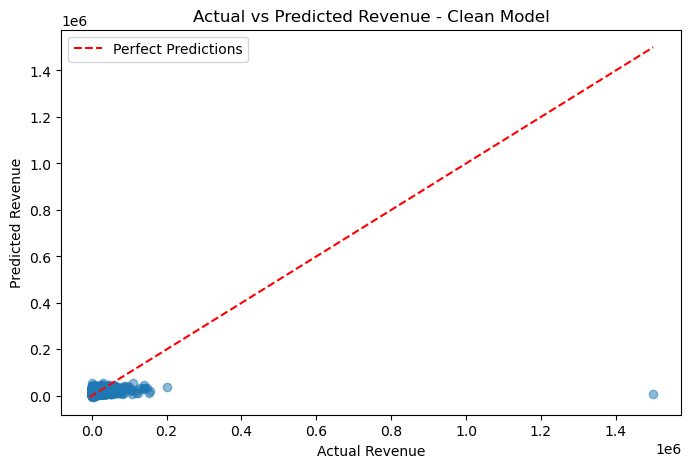

In [18]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue - Clean Model')

min_val = min(y_test.min(), predictions.min())
max_val = max(y_test.max(), predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label = 'Perfect Predictions')
plt.legend()
plt.show()

In [19]:
name = ["Dad", "Delta", "Brooke", "Clebo", "Liam", "Henry"]
gender = ["Male", "Female", "Female", "Male", "Male", "Male"]
age = [42, 21, 20, 16, 14, 11]

walkers = {
    key: [v1, v2]
    for key, v1, v2 in zip(name, gender, age)
}
print(walkers)

{'Dad': ['Male', 42], 'Delta': ['Female', 21], 'Brooke': ['Female', 20], 'Clebo': ['Male', 16], 'Liam': ['Male', 14], 'Henry': ['Male', 11]}


In [20]:
walkers['Tally'] = ["Doggo", 4.5]
print(walkers)

{'Dad': ['Male', 42], 'Delta': ['Female', 21], 'Brooke': ['Female', 20], 'Clebo': ['Male', 16], 'Liam': ['Male', 14], 'Henry': ['Male', 11], 'Tally': ['Doggo', 4.5]}


In [21]:
print(walkers)

{'Dad': ['Male', 42], 'Delta': ['Female', 21], 'Brooke': ['Female', 20], 'Clebo': ['Male', 16], 'Liam': ['Male', 14], 'Henry': ['Male', 11], 'Tally': ['Doggo', 4.5]}


In [22]:
walker_table = pd.DataFrame(walkers)
print(walker_table)

    Dad   Delta  Brooke Clebo  Liam Henry  Tally
0  Male  Female  Female  Male  Male  Male  Doggo
1    42      21      20    16    14    11    4.5


In [23]:
walkers['Dad'].append('bald')
walkers['Delta'].append('blonde')
walkers['Brooke'].append('redhead')
walkers['Clebo'].append('dark hair')
walkers['Liam'].append('redhead')
walkers['Henry'].append('blonde')
walkers['Tally'].append('black')
walker_table = pd.DataFrame(walkers)
print(walker_table)

    Dad   Delta   Brooke      Clebo     Liam   Henry  Tally
0  Male  Female   Female       Male     Male    Male  Doggo
1    42      21       20         16       14      11    4.5
2  bald  blonde  redhead  dark hair  redhead  blonde  black


In [24]:
redheads = [key for key,val in walkers.items() if val[2] == 'redhead']
print(f"The Walker family has {len(redheads)} redheads in the family.\nTheir names are {
        redheads[0]} and {
        redheads[1]}")

The Walker family has 2 redheads in the family.
Their names are Brooke and Liam
